# **Numerical Testing Code Section**

In [7]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [8]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [9]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [11]:
from sklearn.neighbors import  KNeighborsClassifier

In [12]:
from sklearn.metrics import classification_report

In [13]:
from google.colab import files # https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
uploaded = files.upload()  # This will prompt a request to upload files
# and upload it to the colab

# Once uploaded, it will load the CSV files into the colab files system however
#it needs to be uploaded each time someone logs in
atlantic_data = pd.read_csv('atlantic.csv')
pacific_data = pd.read_csv('pacific.csv')


Saving atlantic.csv to atlantic.csv
Saving pacific.csv to pacific.csv


In [14]:
# this section gathers the data from the dataset
# with the y identifying which dataset its from
# either atlantic or pacific and the X getting
# the maximum wind, minimum pressure and low wind ne
atlantic_data['Label'] = 'Atlantic'
pacific_data['Label']= 'Pacific'

combined_data_of_hurricane = pd.concat([atlantic_data, pacific_data])

X = combined_data_of_hurricane[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]

y = combined_data_of_hurricane['Label']
print(X)
print(y)

       Maximum Wind  Minimum Pressure  Low Wind NE
0                80                 0            0
1                80                 0            0
2                80                 0            0
3                80                 0            0
4                80                 0            0
...             ...               ...          ...
26132            35              1002           60
26133            30              1007            0
26134            30              1008            0
26135            25              1009            0
26136            20              1010            0

[75242 rows x 3 columns]
0        Atlantic
1        Atlantic
2        Atlantic
3        Atlantic
4        Atlantic
           ...   
26132     Pacific
26133     Pacific
26134     Pacific
26135     Pacific
26136     Pacific
Name: Label, Length: 75242, dtype: object


**Naives Bayes Implementation to find how much my algorithim can identify mislabeled points out of a specific total**

In [15]:
# Splits the files with 50% of the files going to training and 50% for testing the
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#creates the Naives Bayes model
gnb = GaussianNB()
# Trains the model and predicts it
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 37621 points : 14000


In [16]:
# Splits the files with 70% of the files going to training and 30% for testing the
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred2 = gnb.fit(X_train2, y_train2).predict(X_test2)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test2.shape[0], (y_test2 != y_pred2).sum()))

Number of mislabeled points out of a total 22573 points : 8496


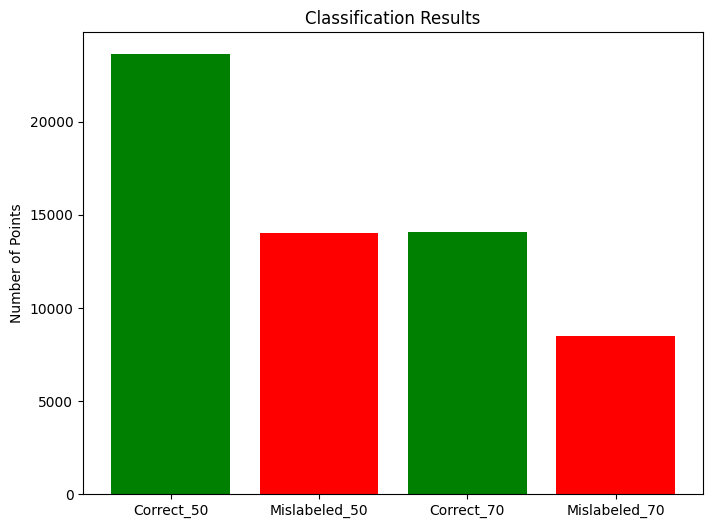

In [17]:
# Creates a bar graph for the both the naive bayes models to be
# able to compare the correct and mislabeled values of the models
# to see which amount of file splitting is better
correct_points = X_test.shape[0] - (y_test != y_pred).sum()  # Total minus to get the total corrected points
mislabeled_points = (y_test != y_pred).sum()
correct_points2 = X_test2.shape[0] - (y_test2 != y_pred2).sum()  # Total minus to get the total corrected points
mislabeled_points2 = (y_test2 != y_pred2).sum()

plt.figure(figsize=(8, 6))
plt.bar(['Correct_50', 'Mislabeled_50', 'Correct_70', 'Mislabeled_70'],
        [correct_points, mislabeled_points, correct_points2, mislabeled_points2],
        color=['green', 'red', 'green', 'red'])
plt.title('Classification Results')
plt.ylabel('Number of Points')
plt.show()

# **Decision Tree Section**

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)#Creates the decision tree model
tree_clf.fit(X_train, y_train)#trains the model of the decision tree

# Optional Section
train_score = tree_clf.score(X_train, y_train)# Displays the Decision Tree training score accuracy and values
test_score = tree_clf.score(X_test, y_test)#Displays the Decision Tree training score accuracy and values

print("Training accuracy:", train_score)
print("Testing accuracy:", test_score)

Training accuracy: 0.6512320246670742
Testing accuracy: 0.6540230190585046


[Text(0.5, 0.8333333333333334, 'x[1] <= 993.5\ngini = 0.454\nsamples = 37621\nvalue = [24500, 13121]'),
 Text(0.25, 0.5, 'x[2] <= 10.0\ngini = 0.425\nsamples = 27269\nvalue = [18923, 8346]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.417\nsamples = 25566\nvalue = [17998.0, 7568.0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.496\nsamples = 1703\nvalue = [925, 778]'),
 Text(0.75, 0.5, 'x[2] <= 87.5\ngini = 0.497\nsamples = 10352\nvalue = [5577, 4775]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.499\nsamples = 9733\nvalue = [5085, 4648]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.326\nsamples = 619\nvalue = [492, 127]')]

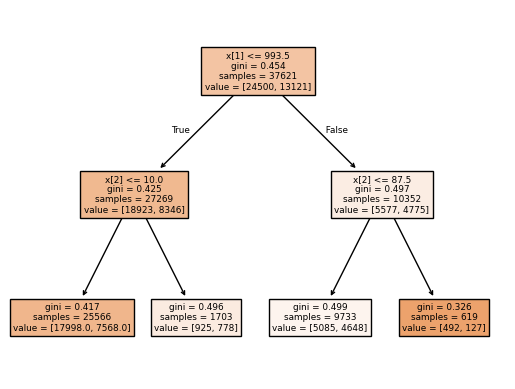

In [19]:
plot_tree(tree_clf, filled=True) # plots the Decision Tree and shows a visualization of it in colour

In [20]:
# Predicts the probability of it being Atantic or Pacific
# its 70% more likely to be an atlantic data
tree_clf.predict_proba([[5, 1.5, 0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.70398185, 0.29601815]])

In [21]:
X_2d = combined_data_of_hurricane[['Maximum Wind', 'Minimum Pressure']].values #stores the values of Maximum Wind and Minimum Pressure
y_numeric = (combined_data_of_hurricane['Label'] == 'Pacific').astype(int) # Converts the hurricane numerical dataset of atlantic or pacific
# into 1 or 0 using the astype(int) function and furthermore it considers Pacific as 1 and Atlantic as 0

# Splits the data into 30 for testing and 70 for training
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_2d, y_numeric, test_size=0.3, random_state=42)

# Creates the Decision tree model with a max_depth of 2 so it can only take in two variables
# them being Max wind and Min pressure
tree_clf_2d = DecisionTreeClassifier(max_depth=2, random_state=42)

# trains the decision tree model
tree_clf_2d.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[1] <= 993.5\ngini = 0.453\nsamples = 52669\nvalue = [34428, 18241]'),
 Text(0.25, 0.5, 'x[0] <= 47.5\ngini = 0.424\nsamples = 38133\nvalue = [26522, 11611]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.449\nsamples = 16508\nvalue = [10887, 5621]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.401\nsamples = 21625\nvalue = [15635.0, 5990.0]'),
 Text(0.75, 0.5, 'x[0] <= 32.5\ngini = 0.496\nsamples = 14536\nvalue = [7906, 6630]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 7261\nvalue = [3522.0, 3739.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.479\nsamples = 7275\nvalue = [4384, 2891]')]

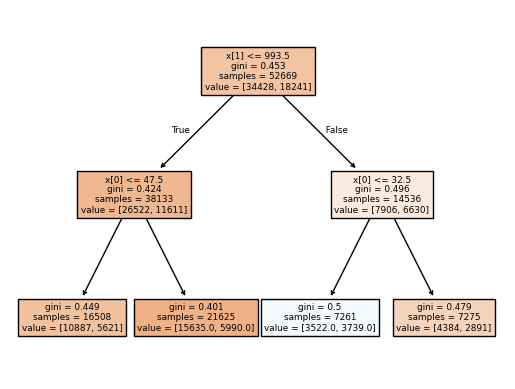

In [22]:
plot_tree(tree_clf_2d, filled=True) # plots the decision tree in colour

In [23]:
# Predicts the probability of it being Atlantic or Pacific
# its 51% likely to be a Pacific dataset
tree_clf_2d.predict_proba([[20, 1002]])


array([[0.48505715, 0.51494285]])

In [24]:
# Predicts the probability of it being Atlantic or Pacific
# its 60% likely to be a Atlantic dataset
tree_clf_2d.predict_proba([[100, 1000]])

array([[0.60261168, 0.39738832]])

In [25]:
# Predicts what if its Atlantic or Pacific
# since its 1 its from the Pacific
tree_clf_2d.predict([[20, 1002]])

array([1])

In [26]:
# Predicts what if its Atlantic or Pacific
# since its 0 its from the Atlantic
tree_clf_2d.predict([[100, 1000]])

array([0])

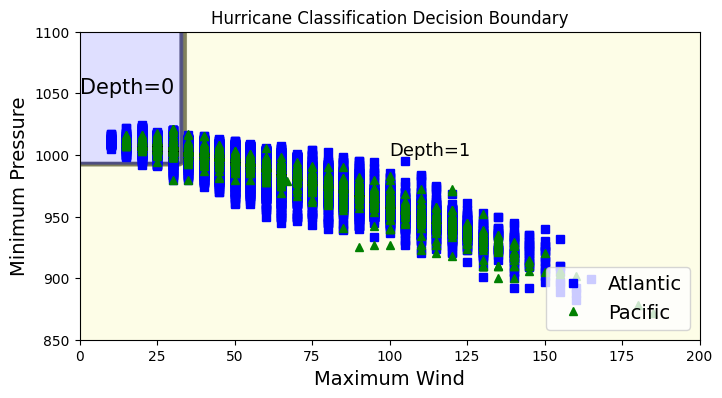

In [27]:
# Creates a constructor that handles any information put into it and
# plots creates the decision boundary plot boundaries and
def plot_decision_boundary(clf, X, y, axes=[0, 200, 850, 1100], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Atlantic")
        plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Pacific")
        plt.axis(axes)
    plt.xlabel("Maximum Wind", fontsize=14)
    plt.ylabel("Minimum Pressure", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# creates the plots for the decision tree model but also uses the
# constructor ad places the model values into the callback in order to
# get the full plot
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_2d, X_train_dt, y_train_dt, axes=[0, 200, 850, 1100], legend=True)
plt.text(0.00, 1050.0, "Depth=0", fontsize=15)
plt.text(100, 1000, "Depth=1", fontsize=13)

plt.title("Hurricane Classification Decision Boundary")
plt.show()

# **K-Nearest Neighbour**

In [28]:
#Reference link https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_2d, y_numeric, test_size=0.3, random_state=42)# Splits the data into 30 for testing and 70 for training

# Creating the KNN model
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=3) #Reference https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification
k_nearest_neighbour.fit(X_train_knn, y_train_knn) # Training the KNN model


score_knn = k_nearest_neighbour.score(X_test_knn, y_test_knn) # getting and storing the KNN model score

print("KNN Score:", score_knn)


KNN Score: 0.6561821645328489


In [29]:
k_nearest_neighbour.predict([[20, 1002]]) # This represents a Atlantic prediction as the output came as 0


array([0])

In [30]:
k_nearest_neighbour.predict([[25, 1009]]) # This represents a Pacific prediction as the output came as 1

array([1])

In [31]:
k_nearest_neighbour.predict([[100, 1000]]) # This represents a Atlantic prediction as the output came as 0

array([0])

In [32]:
#Using classification report to demonstrate the f1 score and percision

# Reference https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html
# Bayes Naive Classification report
BY_Pred = gnb.fit(X_train2, y_train2).predict(X_test2)
print("BY_Pred \n",classification_report(y_test2, BY_Pred))

# Decision Tree Classification report
DT_Pred = tree_clf_2d.fit(X_train_dt, y_train_dt).predict(X_test_dt)
print("DT_Pred \n",classification_report(y_test_dt, DT_Pred))

#KNN Classification report
KNN_Pred =k_nearest_neighbour.fit(X_train_knn, y_train_knn).predict(X_test_knn)
print("KNN_Pred \n",classification_report(y_test_knn, KNN_Pred))

BY_Pred 
               precision    recall  f1-score   support

    Atlantic       0.68      0.79      0.73     14677
     Pacific       0.45      0.31      0.37      7896

    accuracy                           0.62     22573
   macro avg       0.56      0.55      0.55     22573
weighted avg       0.60      0.62      0.60     22573

DT_Pred 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77     14677
           1       0.52      0.20      0.29      7896

    accuracy                           0.66     22573
   macro avg       0.60      0.55      0.53     22573
weighted avg       0.62      0.66      0.60     22573

KNN_Pred 
               precision    recall  f1-score   support

           0       0.71      0.81      0.75     14677
           1       0.51      0.37      0.43      7896

    accuracy                           0.66     22573
   macro avg       0.61      0.59      0.59     22573
weighted avg       0.64      0.66      0.64

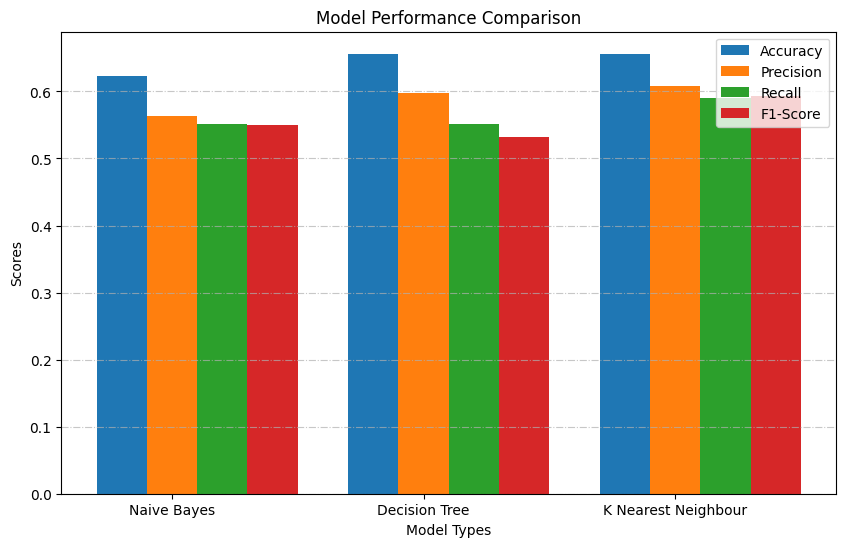

In [33]:
# Based off the classification_report three new reports were made
# however to turn them into graph form they had to be turned into
# dictionaries first to easily get the data
BY_report = classification_report(y_test2, BY_Pred, output_dict=True)
DT_report = classification_report(y_test_dt, DT_Pred, output_dict=True)
KNN_report = classification_report(y_test_knn, KNN_Pred, output_dict=True)

# names of the models used input into an array
model_types = ['Naive Bayes', 'Decision Tree', 'K Nearest Neighbour']
# Dictionary used to store all the classification information
classification_report_data = {
    'Accuracy': [BY_report['accuracy'], DT_report['accuracy'], KNN_report['accuracy']],
    'Precision': [BY_report['macro avg']['precision'], DT_report['macro avg']['precision'], KNN_report['macro avg']['precision']],
    'Recall': [BY_report['macro avg']['recall'], DT_report['macro avg']['recall'], KNN_report['macro avg']['recall']],
    'F1-Score': [BY_report['macro avg']['f1-score'], DT_report['macro avg']['f1-score'], KNN_report['macro avg']['f1-score']]

}

# Creating the size and length of the graph
plt.figure(figsize=(10,6))
width_of_graph = 0.2
length_of_graph = len(model_types)
x_axis = np.arange(length_of_graph)
#plotting four graphs for the classification information with the Accuracy, Precision, Recall, F1-Score
plt.bar(x_axis, classification_report_data['Accuracy'], width=width_of_graph, label='Accuracy')
plt.bar(x_axis + width_of_graph, classification_report_data['Precision'], width=width_of_graph, label='Precision')
plt.bar(x_axis + width_of_graph*2, classification_report_data['Recall'], width=width_of_graph, label='Recall')
plt.bar(x_axis + width_of_graph*3, classification_report_data['F1-Score'], width=width_of_graph, label='F1-Score')

# adding the x and y plot labels and the legend
plt.xticks(x_axis+width_of_graph, model_types)
plt.xlabel('Model Types')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
#plotting the grid and showing the graph
plt.grid(True, axis='y', linestyle='-.', alpha=0.7)
plt.show()

# Based off the graph the best two for accuracy are the Decision tree and KNN however the KNN
# is the overall best model in the other categories


# **This section uses the tree to identify what type of storm is happening While the previous code is used to identify where it comes from**

In [34]:
# This section is mainly for more added features that were discussed
X_HU_Detection = combined_data_of_hurricane[['Maximum Wind', 'Minimum Pressure']].values
# This part instead detecting if its from atlantic or pacific it instead identifies what type
# Of storm it is
y_numeric_Detection = combined_data_of_hurricane['Status'].str.strip().map({
    'EX': 0,    # No Storm
    'HU': 1,    # Hurricane
    'TS': 2,    # Tropical Storm
    'TD': 3,    # Tropical Depression
    'WV': 4,    # Tropical Wave
    'LO': 5,    # Low Pressure
    'SS': 6,    # Subtropical Storm
    'DB': 7,    # Disturbance
    'SD': 8,    # Subtropical Depression
    'ET': 9,    # Extratropical Transition
    'PT': 10,   # Post Tropical
    'ST': 11    # Storm
})# Reference for map() https://www.geeksforgeeks.org/python-pandas-map/
# The use of map is to map the database and make it into a dictionary
# the use of strip is to remove any spaces as to avoid errors when the detection tree goes through the system

# As stated before this creates a new train and testing files that seperated by 70 and 30
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_HU_Detection, y_numeric_Detection, test_size=0.3, random_state=42)

#
tree_hurricane_identifier = DecisionTreeClassifier(max_depth=2, random_state=42) # creates a decision tree model with a depth of 2
tree_hurricane_identifier.fit(X_train_dt, y_train_dt) # This function trains the model on the 70 percent dataset


DecisionTreeClassifier(max_depth=2, random_state=42)

In [35]:
# A constructor was built that takes in two values a max wind and minimum pressure
# which the model was made with and then it does two things one is get all the
# longitude and latitude locations of those specific values and prints them
# the second thing it does is it predict which type of storm it is from 0 to 11

def hurricane_identifier_and_location(max_wind, min_pressure):
  prediction = tree_hurricane_identifier.predict([[max_wind, min_pressure]])
  loc = combined_data_of_hurricane[(combined_data_of_hurricane['Maximum Wind']==max_wind) &
   (combined_data_of_hurricane['Minimum Pressure']==min_pressure)][['Latitude', 'Longitude']]
  print(f'Storm_Prediction: {prediction} \n')
  print(loc)
  return loc


In [36]:
# This sends the values back to the constructor and prints the prediction
# and all the locations that it was detected from. for this one we use 80 and 0
# which is a hurricane
hurricane_identifier_and_location(80,0)

Storm_Prediction: [1] 

      Latitude Longitude
0        28.0N     94.8W
1        28.0N     95.4W
2        28.0N     96.0W
3        28.1N     96.5W
4        28.2N     96.8W
...        ...       ...
15815    25.8N    173.6E
15853    32.7N    177.4W
15889    16.5N    147.0W
17059    29.9N    129.7E
17343     6.7N    169.8E

[1542 rows x 2 columns]


,Latitude,Longitude
0,28.0N,94.8W
1,28.0N,95.4W
2,28.0N,96.0W
3,28.1N,96.5W
4,28.2N,96.8W
...,...,...
15815,25.8N,173.6E
15853,32.7N,177.4W
15889,16.5N,147.0W
17059,29.9N,129.7E


In [37]:
 #This shows the possible locations again and that
 # this is a tropical depression
hurricane_identifier_and_location(20,1002)


Storm_Prediction: [3] 

      Latitude Longitude
22332    32.9N     86.5W
31699    25.2N     98.7W
31700    25.3N     99.0W
40358    31.7N     96.9W
43815    35.3N     89.1W
45622    32.7N     88.6W
45679    40.2N     88.7W
45680    42.2N     86.5W
46735    17.5N     92.8W


,Latitude,Longitude
22332,32.9N,86.5W
31699,25.2N,98.7W
31700,25.3N,99.0W
40358,31.7N,96.9W
43815,35.3N,89.1W
45622,32.7N,88.6W
45679,40.2N,88.7W
45680,42.2N,86.5W
46735,17.5N,92.8W


In [38]:
tree_hurricane_identifier.predict_proba([[20, 1002]]) # this section identifies that its 70% to be number 3
# a tropical depression

array([[4.45676868e-02, 0.00000000e+00, 0.00000000e+00, 7.91059735e-01,
        4.81090472e-03, 1.25885340e-01, 0.00000000e+00, 1.45663504e-02,
        1.30295336e-02, 5.87999465e-03, 2.00454363e-04, 0.00000000e+00]])

In [39]:
tree_hurricane_identifier.predict_proba([[80, 0]]) # Based off the predictions it is a 90% chance its a hurricane

array([[6.96247345e-03, 9.92329478e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.08048147e-04]])

In [40]:
tree_hurricane_identifier.predict([[20, 1002]])# based off the dataset it shows that its a Tropical Depression

array([3])

In [41]:
tree_hurricane_identifier.predict([[80, 0]]) #Based off the dataset from these values the array of 1 shows its a hurricane

array([1])

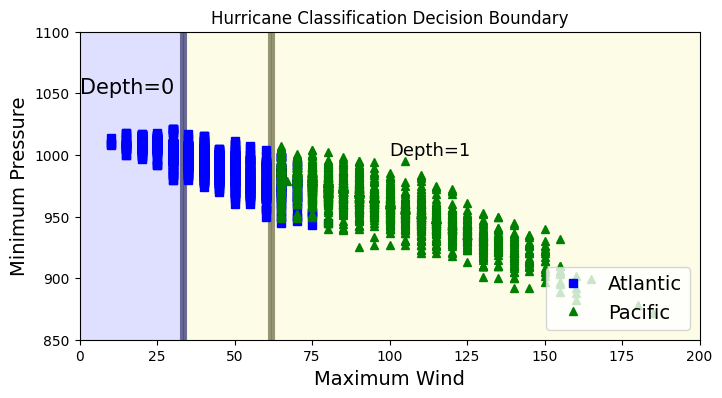

In [42]:
# using the plotting diagram from the previous part it shows the plotted decision
# boundary
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_hurricane_identifier, X_train_dt, y_train_dt, axes=[0, 200, 850, 1100], legend=True)
plt.text(0.00, 1050.0, "Depth=0", fontsize=15)
plt.text(100, 1000, "Depth=1", fontsize=13)

plt.title("Hurricane Classification Decision Boundary")
plt.show()